## Protein-RNA interaction notebook
##### Last updated 2023-02-10


This notebook calculates the contacts between NTD-RBD and RBD with (rU)10 molecules, and is used to generate:


* Fig. 5B
* Fig. S11A (profile comparison)
* Fig. S11A (threshold titration)
* Fig. S11B (not directly, but this file generates the VMD color mapping file used)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.cm as cm

# special imports for scaling maps!
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'


from soursop.sstrajectory import SSTrajectory

In [2]:
#soursop to read in trajectory



# read in xtc and pdb - note we are reading in a sub-sampled
# trajectory here as an example (500 frames), while the actual
# simulations have ~80,000 frames

prefix = "../../data/rna_protein_contacts/NTD_RBD/"
xtc = prefix + "subsampled_NTD_RBD_U10.xtc"
pdb = prefix + "NTD_RBD_U10.pdb"

NTD_RBD = SSTrajectory(xtc, pdb, extra_valid_residue_names=['RPU'])

In [3]:
nmr_csp = np.loadtxt('../../data/rna_protein_contacts/NMR_data/CSP_data_10mer_final.csv', delimiter=',')


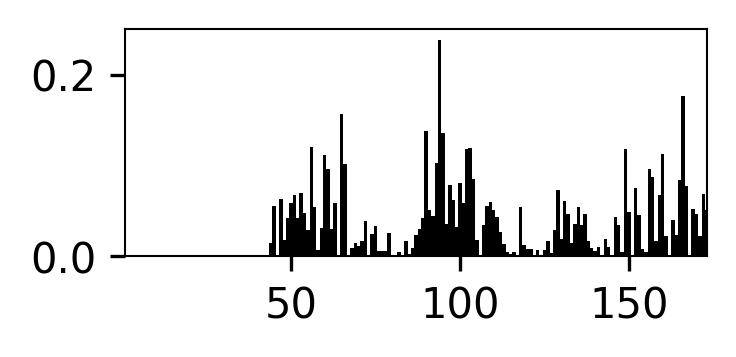

In [4]:
fig = figure(num=None, figsize=(2.5, 1.0), dpi=150, facecolor='w', edgecolor='k')

plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
plt.xlim([1,173])
plt.ylim([0,0.25])

plt.savefig("figure_panels/NMR.pdf", dpi = 350, bbox_inches='tight')

In [5]:

# pre-loaded but could be calculated using the following command
# cmap = T.get_interchain_contact_map(0,1,threshold=14, verbose=True)
cmap_ntd_rbd_full = np.loadtxt('../../data/rna_protein_contacts/NTD_RBD/10mer_inter_residue_contact_map_thresh_14.csv')



In [8]:
n_protein_res = NTD_RBD.proteinTrajectoryList[0].n_residues
n_RNA_res = NTD_RBD.proteinTrajectoryList[1].n_residues

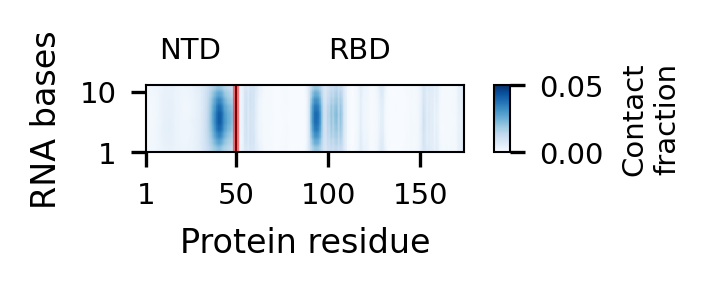

In [9]:
fig = figure(num=None, figsize=(2.5, 1.4), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

# set the residue numbers to match real-world protein/RNA numbering. Note here
# we're starting at 1, but if you were looking at other proteins with subdomains that
# don't start at 1 this is really useful!!
start_protein = 1
end_protein = 1 + n_protein_res

start_rna = 1
end_rna = 1 + n_RNA_res


# note vmin and vmax here define the dynamic range of the figure
im = plt.imshow(cmap_ntd_rbd_full.transpose(),
                origin='lower', 
                extent=[start_protein, end_protein, start_rna, end_rna],
                vmin=0, vmax=0.05, cmap = 'Blues',aspect='auto', interpolation=None)


plt.xlabel('Protein residue', fontsize=8)
plt.ylabel('RNA bases', fontsize=8)

ax = plt.gca()
ax.autoscale(False)

# can draw on a line dividing the NTD and RBD 
NTD_RBD_junction=50
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-k',  alpha=1,linewidth=0.5)
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-r',  alpha=0.5,)

# can label the two halves (15 and 100 [x position of text] were chosen because 
# they looked good)
plt.text(8, 15, 'NTD', fontsize=7)
plt.text(100, 15, 'RBD', fontsize=7)

# draw color bar seperately so it matches the dimensions of the imshow figure

#plt.xticks(np.arange(start_protein, end_protein, 25.0))
plt.xticks([1,50,100,150], fontsize=7)
plt.yticks([1,10], fontsize=7)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(cax=cax, ticks=[0, .05])
cb.set_label('Contact\nfraction', fontsize=7)
cb.ax.tick_params(labelsize=7)




# include this to stop matplotlib being dumb and chopping off axes info...
plt.tight_layout()

plt.savefig("figure_panels/Contact_NTDRBD_rU10_14A.pdf", dpi = 350, bbox_inches='tight')



In [10]:

prefix = "../../data/rna_protein_contacts/RBD/"
xtc = prefix + "subsampled_RBD_U10.xtc"
pdb = prefix + "RBD_U10.pdb"

RBD = SSTrajectory(xtc, pdb, extra_valid_residue_names=['RPU'])

In [11]:
threshold = 14 # cutoff distance for what is a 'contact'

# note verbose just means it prints progress (see docs)
# cmap_rbd = RBD.get_interchain_contact_map(0,1,threshold=threshold, verbose=True)

# recommend saving contact maps so you dont have to recompute them!
cmap_rbd = np.loadtxt('../../data/rna_protein_contacts/RBD/RBD_10mer_inter_residue_contact_map_thresh_14.csv')





In [12]:
empty_ntd = np.zeros((49,10))
cmap_rbd_full = np.vstack((empty_ntd, cmap_rbd))

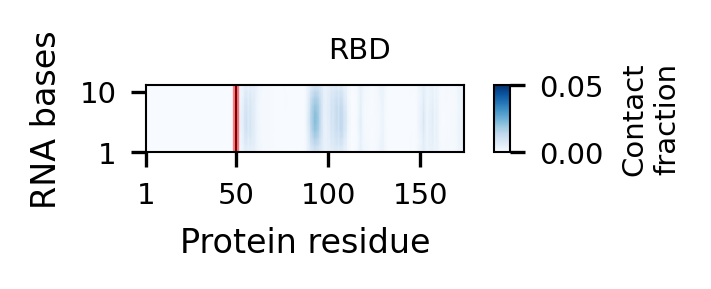

In [13]:
fig = figure(num=None, figsize=(2.5, 1.4), dpi=150, facecolor='w', edgecolor='k')
ax_list = fig.axes

# set the residue numbers to match real-world protein/RNA numbering. Note here
# we're starting at 1, but if you were looking at other proteins with subdomains that
# don't start at 1 this is really useful!!
start_protein = 1
end_protein = 1 + n_protein_res

start_rna = 1
end_rna = 1 + n_RNA_res


# note vmin and vmax here define the dynamic range of the figure
im = plt.imshow(cmap_rbd_full.transpose(),
                origin='lower', 
                extent=[start_protein, end_protein, start_rna, end_rna],
                vmin=0, vmax=0.05, cmap = 'Blues',aspect='auto', interpolation=None)


plt.xlabel('Protein residue', fontsize=8)
plt.ylabel('RNA bases', fontsize=8)

ax = plt.gca()
ax.autoscale(False)

# can draw on a line dividing the NTD and RBD 
NTD_RBD_junction=50
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-k',  alpha=1,linewidth=0.5)
plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-r',  alpha=0.5,)

# can label the two halves (15 and 100 [x position of text] were chosen because 
# they looked good)
plt.text(100, 15, 'RBD', fontsize=7)

# draw color bar seperately so it matches the dimensions of the imshow figure

#plt.xticks(np.arange(start_protein, end_protein, 25.0))
plt.xticks([1,50,100,150], fontsize=7)
plt.yticks([1,10], fontsize=7)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(cax=cax, ticks=[0, .05])
cb.set_label('Contact\nfraction', fontsize=7)
cb.ax.tick_params(labelsize=7)

# include this to stop matplotlib being dumb and chopping off axes info...
plt.tight_layout()

plt.savefig("figure_panels/Contact_RBD_rU10_14A.pdf", dpi = 350, bbox_inches='tight')



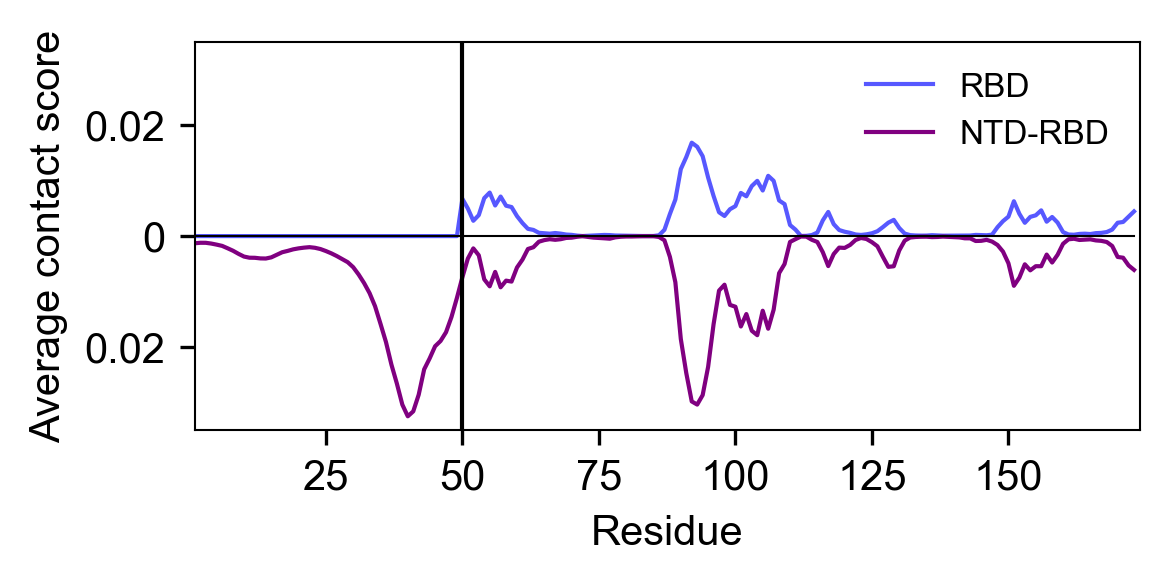

In [85]:
fig = figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)

n_nts = 10

plt.plot(indices, np.sum(cmap_rbd_full.transpose(),0)/n_nts,color='#5758ff', linewidth=1, label='RBD')
plt.plot(indices, -np.sum(cmap_ntd_rbd_full.transpose(),0)/n_nts, color='purple', linewidth=1, label='NTD-RBD')
#plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
plt.plot([NTD_RBD_junction,NTD_RBD_junction],[-0.04,0.04], color='k',lw=1)
plt.plot([indices[0], indices[-1]],[0,0],'-k',linewidth=0.5)

plt.xlabel('Residue',fontsize=10)
plt.ylabel('Average contact score',fontsize=10)
plt.legend(frameon=False, fontsize=8)

plt.ylim([-0.035,0.035])
plt.yticks([-0.02,0,0.02],[0.02,0,0.02])
plt.xlim([1,n_protein_res+1])
plt.tight_layout()
plt.savefig('figure_panels/interaction_comparison.pdf')


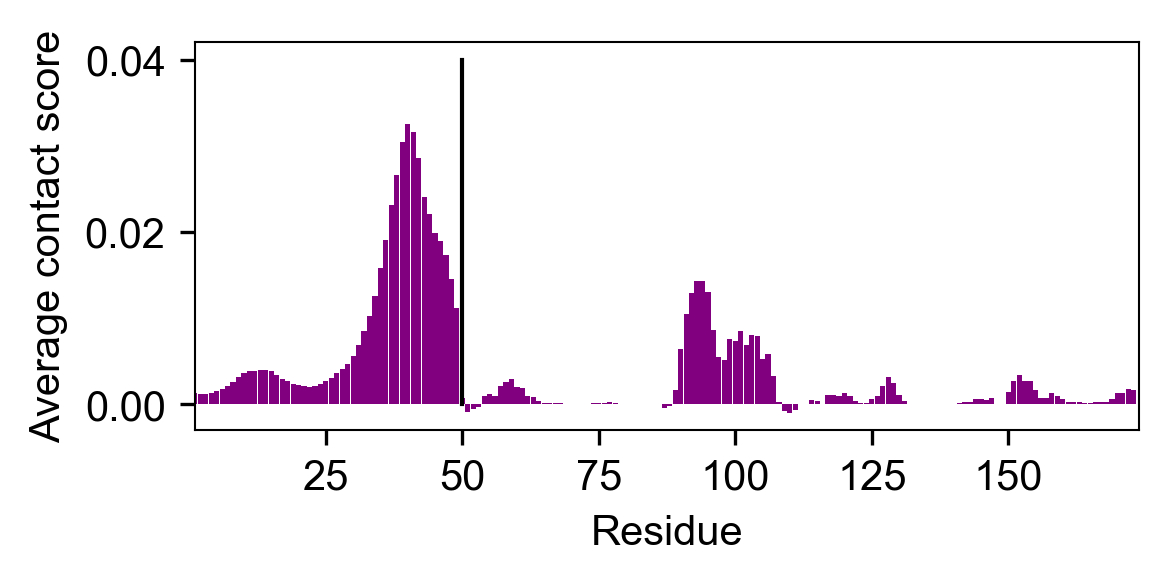

In [73]:
fig = figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)

n_nts = 10

enhancement = np.sum(cmap_ntd_rbd_full.transpose(),0)/10-np.sum(cmap_rbd_full.transpose(),0)/10

plt.bar(indices, enhancement,color='purple', width=0.95)
#plt.plot(indices, , color='purple', linewidth=1, label='NTD-RBD')
#plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
plt.plot([NTD_RBD_junction,NTD_RBD_junction],[0,0.04], color='k',lw=1)
#plt.plot([indices[0], indices[-1]],[1,1],'-k',linewidth=2)

plt.xlabel('Residue',fontsize=10)
plt.ylabel('Average contact score',fontsize=10)


#plt.ylim([0,0.05])
#plt.yticks([-0.02,0,0.02],[0.02,0,0.02])
plt.xlim([1,n_protein_res+1])
plt.tight_layout()
plt.savefig('figure_panels/interaction_enhancement.pdf')


### Build VMD visualization data file
The code below builds a text file which can read by VMD to annotate an NTD-RBD structure and color residues by 'beta' - which here would be set to the normalized enhancement score. 

We do some sanity checking here to ensure negative values are set to 0 and to make sure we focus on the RBD, NDT residues with a normalized score > 1 are set to 1.

This coloring is used to generate Fig. S11B

In [82]:
enhancement = enhancement/np.max(enhancement[50:])

# softmax so we really focus on RBD and NTD avoids blowing out
enhancement[enhancement>1] = 1
enhancement[enhancement<0] = 0

with open('vmd_coloring.txt','w') as fh:
    for idx, x in enumerate(enhancement):
        fh.write(f'{idx} A {x}\n')
        

## Compare dependence on threshold for rU10
The code below shows how the binding profile varies as a function of the distance threshold used to define a contact for the contact fraction analysis.

In [21]:
scores_titration = {}
contact_thresholds = [8,9,10,11,12,13,14,15,16,17,18,19,20]


for threshold in contact_thresholds:
    
    cmap = np.loadtxt(f'../../data/rna_protein_contacts/NTD_RBD/10mer_inter_residue_contact_map_thresh_{threshold}.csv')
    
    scores_titration[threshold]= cmap.transpose()
    



In [31]:


# set the residue numbers to match real-world protein/RNA numbering. Note here
# we're starting at 1, but if you were looking at other proteins with subdomains that
# don't start at 1 this is really useful!!
start_protein = 1
end_protein = 1 + n_protein_res

start_rna = 1
end_rna = 1 + n_RNA_res


for threshold in contact_thresholds:

    fig = figure(num=None, figsize=(4.5, 1.5), dpi=150, facecolor='w', edgecolor='k')
    ax_list = fig.axes


    # note vmin and vmax here define the dynamic range of the figure
    im = plt.imshow(scores_titration[threshold],
                    origin='lower', 
                    extent=[start_protein, end_protein, start_rna, end_rna],
                    vmin=0, vmax=0.05, cmap = 'Blues',aspect='auto', interpolation=None)


    plt.xlabel('', fontsize=8)
    plt.ylabel('RNA bases', fontsize=14)

    ax = plt.gca()
    ax.autoscale(False)

    # can draw on a line dividing the NTD and RBD 
    NTD_RBD_junction=50
    plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-k',  alpha=1,linewidth=0.5)
    plt.plot([NTD_RBD_junction, NTD_RBD_junction],[1,11], '-r',  alpha=0.5,)

    # can label the two halves (15 and 100 [x position of text] were chosen because 
    # they looked good)
    #plt.text(15, 11.5, 'NTD', fontsize=9)
    #plt.text(100, 11.5, 'RBD', fontsize=9)

    # draw color bar seperately so it matches the dimensions of the imshow figure

    #plt.xticks(np.arange(start_protein, end_protein, 25.0))
    plt.xticks([1,50,100,150], fontsize=14)
    plt.yticks([1,10], fontsize=14)

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(cax=cax, ticks=[0, .05])
    cb.set_label('Contact\nfraction', fontsize=7)
    cb.ax.tick_params(labelsize=7)




    # include this to stop matplotlib being dumb and chopping off axes info...
    plt.tight_layout()

    plt.savefig(f"figure_panels/titration_contact_NTDRBD_rU10_{threshold}.pdf", dpi = 350, bbox_inches='tight')
    
    plt.close()



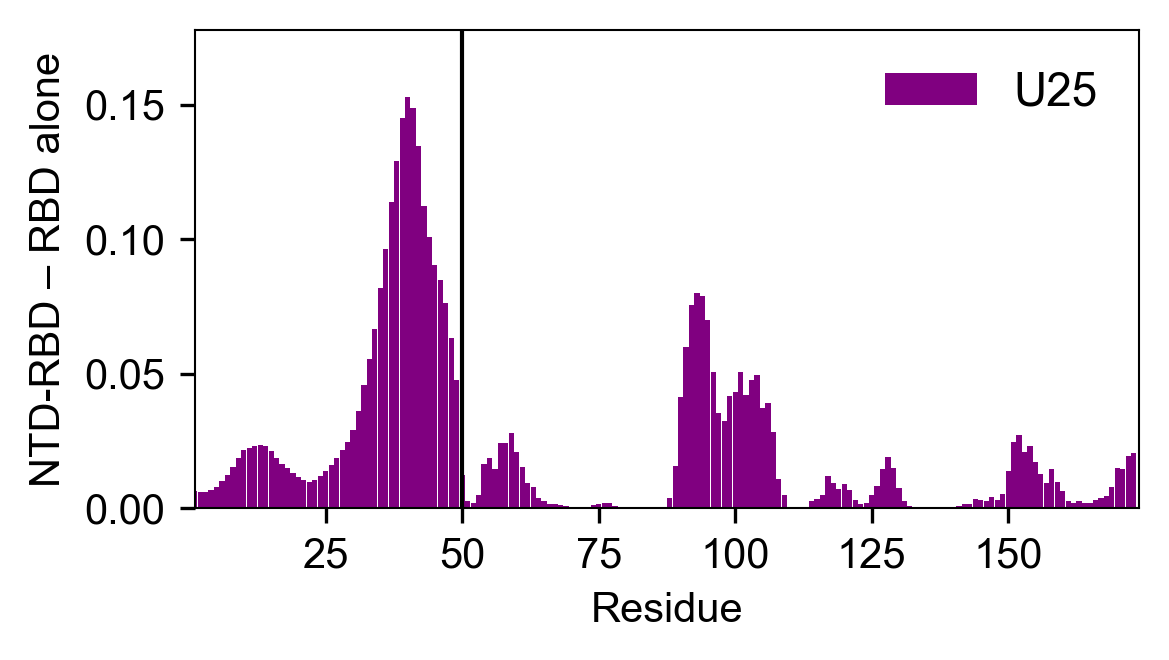

In [104]:
r = 25

cmap_U_NTD_RBD = np.loadtxt(f'../../data/rna_protein_contacts/NTD_RBD/longer_RNAs_thresh_14/{r}mer_inter_residue_contact_map_thresh_14.csv')
cmap_U_RBD = np.loadtxt(f'../../data/rna_protein_contacts/RBD/longer_RNAs_thresh_14/RBD_{r}mer_inter_residue_contact_map_thresh_14.csv')

empty_ntd_U = np.zeros((49,r))
cmap_U_RBD = np.vstack((empty_ntd_U, cmap_U_RBD))



fig = figure(num=None, figsize=(4, 2.3), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)


enhancement = np.sum(cmap_U_NTD_RBD.transpose(),0)/n_nts - np.sum(cmap_U_RBD.transpose(),0)/n_nts

max_enhance = np.max(enhancement)+0.025

plt.bar(indices, enhancement,color='purple', width=0.95, label=f'U{r}')
#plt.plot(indices, , color='purple', linewidth=1, label='NTD-RBD')
#plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
plt.plot([NTD_RBD_junction,NTD_RBD_junction],[0,max_enhance], color='k',lw=1)
#plt.plot([indices[0], indices[-1]],[1,1],'-k',linewidth=2)

plt.xlabel('Residue',fontsize=10)
plt.ylabel('NTD-RBD – RBD alone',fontsize=10)
plt.legend(frameon=False,fontsize=11)


plt.ylim([0,max_enhance])
#plt.yticks([-0.02,0,0.02],[0.02,0,0.02])
plt.xlim([1,n_protein_res+1])
plt.tight_layout()


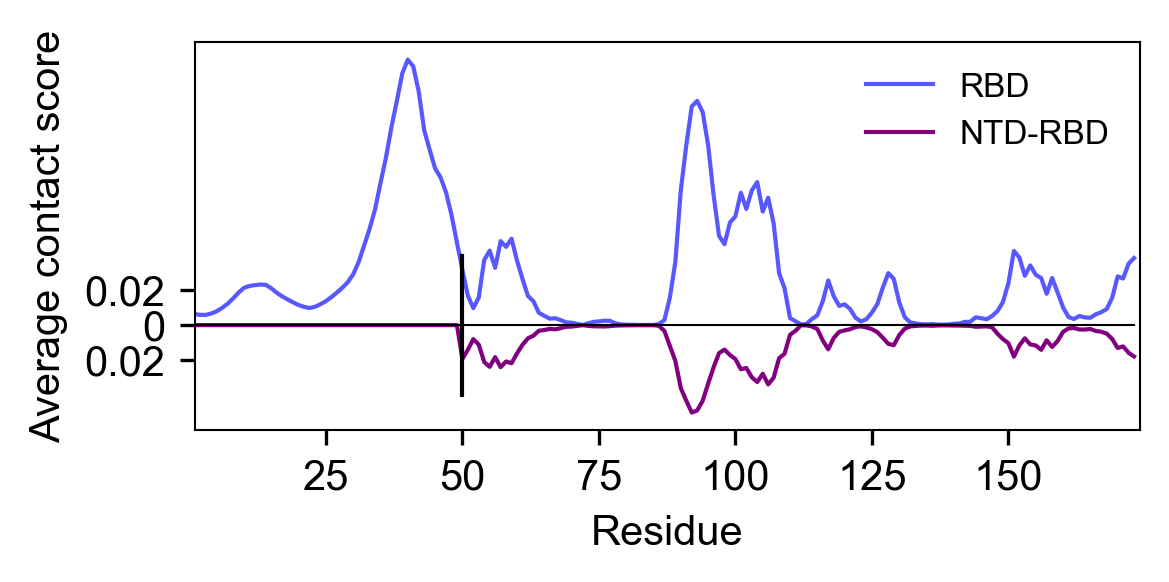

In [93]:



fig = figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
indices = np.arange(1,n_protein_res+1)

n_nts = 25

plt.plot(indices, np.sum(cmap_u25_NTD_RBD.transpose(),0)/n_nts,color='#5758ff', linewidth=1, label='RBD')
plt.plot(indices, -np.sum(cmap_u25_RBD.transpose(),0)/n_nts, color='purple', linewidth=1, label='NTD-RBD')
#plt.bar(nmr_csp.transpose()[0], nmr_csp.transpose()[1], width=1, color='k')
plt.plot([NTD_RBD_junction,NTD_RBD_junction],[-0.04,0.04], color='k',lw=1)
plt.plot([indices[0], indices[-1]],[0,0],'-k',linewidth=0.5)

plt.xlabel('Residue',fontsize=10)
plt.ylabel('Average contact score',fontsize=10)
plt.legend(frameon=False, fontsize=8)

#plt.ylim([-0.035,0.035])
plt.yticks([-0.02,0,0.02],[0.02,0,0.02])
plt.xlim([1,n_protein_res+1])
plt.tight_layout()
#plt.savefig('figure_panels/interaction_comparison.pdf')
